# Charger les données

In [30]:
import pandas as pd

# Charger les fichiers
ratings = pd.read_csv("../data/ml-100k/ml-100k/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])
movies = pd.read_csv("../data/ml-100k/ml-100k/u.item", sep="|", encoding="latin-1", names=["movie_id", "movie_title", "release_date", "video_release_date", "imdb_url", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", 
    "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])
users = pd.read_csv("../data/ml-100k/ml-100k/u.user", sep="|", names=["user_id", "age", "gender", "occupation", "zip_code"])

# Afficher les premières lignes
display(ratings.head())
display(movies.head())
display(users.head())


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Vérifier les dimensions et types des données

# Nettoyage des données

In [31]:
# Supprimer les colonnes inutiles
movies.drop(columns=["video_release_date"], inplace=True)

# Supprime ou impute les valeurs manquantes
movies.dropna(subset=["release_date", "imdb_url"], inplace=True)

In [32]:
# Vérifie si des colonnes contiennent des valeurs manquantes
print("Valeurs manquantes dans ratings :")
print(ratings.isnull().sum())

print("\nValeurs manquantes dans movies :")
print(movies.isnull().sum())

print("\nValeurs manquantes dans users :")
print(users.isnull().sum())

Valeurs manquantes dans ratings :
user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

Valeurs manquantes dans movies :
movie_id        0
movie_title     0
release_date    0
imdb_url        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

Valeurs manquantes dans users :
user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64


In [33]:
# Convertir les timestamps en format datetime pour une analyse temporelle éventuelle
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit="s")

# Extraire l’année des dates de sortie des films pour simplifier l’analyse
movies["release_year"] = movies["release_date"].str.extract(r"(\d{4})").astype(float)

In [34]:
# Vérifier les données
print(ratings.info())
print(movies.info())
print(users.info())

display(ratings.head())
display(movies.head())
display(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    100000 non-null  int64         
 1   item_id    100000 non-null  int64         
 2   rating     100000 non-null  int64         
 3   timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1679 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      1679 non-null   int64  
 1   movie_title   1679 non-null   object 
 2   release_date  1679 non-null   object 
 3   imdb_url      1679 non-null   object 
 4   unknown       1679 non-null   int64  
 5   Action        1679 non-null   int64  
 6   Adventure     1679 non-null   int64  
 7   Animation     1679 non-null   int64  
 8   Chil

,user_id,item_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


,movie_id,movie_title,release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Vérification de cohérence

## 1. Vérifier les clés entre les tables

Les tables ratings, movies, et users doivent être reliées correctement via leurs clés primaires/étrangères :

Films référencés dans les évaluations (ratings) doivent exister dans la liste des films (movies) :

In [35]:
missing_movies = set(ratings["item_id"]) - set(movies["movie_id"])
print(f"Films manquants dans movies : {missing_movies}")

Films manquants dans movies : {267, 1358, 1359}


Utilisateurs référencés dans les évaluations (ratings) doivent exister dans la table des utilisateurs (users) :

In [36]:
missing_users = set(ratings["user_id"]) - set(users["user_id"])
print(f"Utilisateurs manquants dans users : {missing_users}")

Utilisateurs manquants dans users : set()


In [37]:
missing_movies_ratings = ratings[ratings["item_id"].isin([267, 1358, 1359])]
print(f"Évaluations pour les films manquants :\n{missing_movies_ratings}")

Évaluations pour les films manquants :
       user_id  item_id  rating           timestamp
2172       130      267       5 1997-10-02 14:07:19
3781         5      267       4 1997-09-30 15:57:44
7245       268      267       3 1997-10-01 21:41:17
12475      297      267       3 1997-09-28 01:12:19
14756      319      267       4 1997-10-01 12:08:10
15292        1      267       4 1997-10-01 08:02:35
26077      181     1359       1 1997-11-08 04:10:00
36931      405     1359       1 1998-01-23 10:03:10
37163      288     1358       5 1998-02-07 22:57:21
49295      532      267       3 1997-09-28 10:09:08
93523      833      267       1 1997-09-30 21:41:09
93843      181     1358       1 1997-11-08 04:08:40
99723      422      267       4 1997-09-30 21:46:26


Supprimer les évaluations des films manquants

In [38]:
ratings = ratings[~ratings["item_id"].isin([267, 1358, 1359])]

In [39]:
print(set(ratings["item_id"]) - set(movies["movie_id"])) 

set()


## 2. Statistiques descriptives

In [40]:
print(ratings.describe())
print(movies.describe())
print(users.describe())

            user_id       item_id        rating                      timestamp
count  99987.000000  99987.000000  99987.000000                          99987
mean     462.506256    425.507076      3.529929  1997-12-31 00:53:19.261343744
min        1.000000      1.000000      1.000000            1997-09-20 03:05:10
25%      254.000000    175.000000      3.000000            1997-11-13 19:19:19
50%      447.000000    322.000000      4.000000            1997-12-22 21:43:03
75%      682.000000    631.000000      4.000000            1998-02-23 18:53:04
max      943.000000   1682.000000      5.000000            1998-04-22 23:10:38
std      266.613847    330.763806      1.125606                            NaN
          movie_id      unknown       Action    Adventure    Animation  \
count  1679.000000  1679.000000  1679.000000  1679.000000  1679.000000   
mean    841.226325     0.000596     0.148898     0.080405     0.025015   
std     485.599531     0.024405     0.356094     0.272000     0.156

## 3. Analyse des doublons

In [41]:
duplicate_ratings = ratings.duplicated()
print(f"Nombre de doublons dans ratings : {duplicate_ratings.sum()}")

Nombre de doublons dans ratings : 0


# Analyse exploratoire des données

### 1. Distribution des évaluations

Analyse combien de fois chaque note (1 à 5) a été donnée.

C:\Users\nicol\AppData\Local\Temp\ipykernel_59308\1430868796.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings, palette="muted")


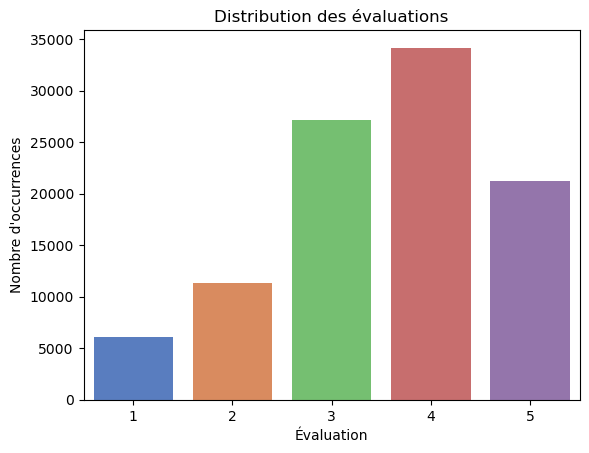

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="rating", data=ratings, palette="muted")
plt.title("Distribution des évaluations")
plt.xlabel("Évaluation")
plt.ylabel("Nombre d'occurrences")
plt.show()

### Contexte
Ce graphique montre la répartition des notes attribuées par les utilisateurs aux films dans le dataset. Chaque barre représente le nombre d'occurrences pour chaque note possible (de 1 à 5).

### Observation
- La note "4" est la plus fréquente, suivie de "3" et "5".
- Les notes les plus basses, "1" et "2", sont beaucoup moins courantes.
- Cela montre une tendance des utilisateurs à attribuer des notes positives aux films.

### Conclusion
- Cette distribution indique un biais potentiel vers des notes plus élevées, ce qui peut influencer les recommandations en favorisant les films bien notés.
- Ce biais devra être pris en compte lors de l’analyse des biais dans le moteur de recommandations.


### 2. Distribution des évaluations par utilisateur

Analyse combien de films chaque utilisateur a évalué.

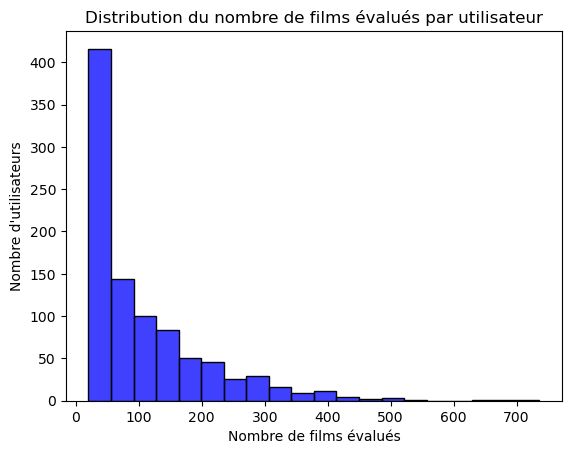

In [43]:
user_movie_counts = ratings.groupby("user_id")["item_id"].count()

sns.histplot(user_movie_counts, kde=False, bins=20, color="blue")
plt.title("Distribution du nombre de films évalués par utilisateur")
plt.xlabel("Nombre de films évalués")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

### Contexte
Ce graphique illustre combien de films chaque utilisateur a évalués. Cela nous aide à comprendre le comportement des utilisateurs dans le dataset.

### Observation
- La majorité des utilisateurs ont évalué moins de 100 films.
- Quelques utilisateurs ont évalué un nombre exceptionnellement élevé de films (plus de 500), mais ces cas sont rares.

### Conclusion
- Les utilisateurs qui évaluent beaucoup de films peuvent avoir une influence disproportionnée sur le moteur de recommandations.
- Les utilisateurs ayant peu d'évaluations pourraient bénéficier d'approches comme le "cold-start problem" pour améliorer leurs recommandations.


### 3. Distribution des évaluations par film

Analyse combien d’évaluations chaque film a reçu.

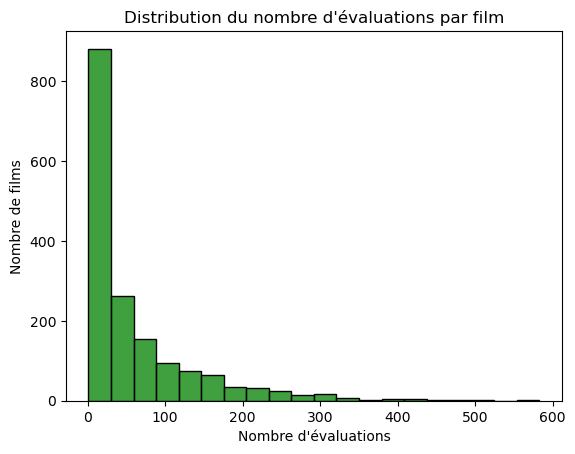

In [44]:
movie_rating_counts = ratings.groupby("item_id")["user_id"].count()

sns.histplot(movie_rating_counts, kde=False, bins=20, color="green")
plt.title("Distribution du nombre d'évaluations par film")
plt.xlabel("Nombre d'évaluations")
plt.ylabel("Nombre de films")
plt.show()

### Contexte
Ce graphique montre combien d'évaluations chaque film a reçues. Il permet d’identifier les films populaires et ceux qui ont été peu évalués.

### Observation
- La majorité des films ont reçu très peu d'évaluations (moins de 100).
- Un petit groupe de films a reçu un nombre exceptionnellement élevé d'évaluations (plus de 400).

### Conclusion
- Les films très populaires (souvent bien notés) risquent d'être sur-représentés dans les recommandations.
- Il est important d’équilibrer la représentation des films pour éviter que seuls les films populaires soient recommandés.


In [46]:
top_movies = movie_rating_counts.sort_values(ascending=False).head(10)
print("Films les plus évalués :")
print(top_movies)

Films les plus évalués :
item_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
Name: user_id, dtype: int64


### Contexte
Ces films ont reçu le plus grand nombre d’évaluations. Ils sont probablement populaires ou bien connus.

### Observation
- Les films comme "Star Wars (1977)" et "Shawshank Redemption, The (1994)" dominent les évaluations.
- Ces films auront probablement une forte présence dans les recommandations basées sur la popularité.

### Conclusion
- Les films populaires doivent être pondérés dans le moteur de recommandations pour éviter qu’ils éclipsent d'autres suggestions moins évaluées.


### 4. Notes moyennes par film

Identifie les films les mieux notés (par au moins un certain nombre d’utilisateurs, pour éviter les biais) :

In [47]:
merged = ratings.merge(movies, left_on="item_id", right_on="movie_id")
average_ratings = merged.groupby("movie_title").filter(lambda x: len(x) > 20).groupby("movie_title")["rating"].mean().sort_values(ascending=False)

print("Films les mieux notés :")
print(average_ratings.head(10))

Films les mieux notés :
movie_title
Close Shave, A (1995)                                     4.491071
Schindler's List (1993)                                   4.466443
Wrong Trousers, The (1993)                                4.466102
Casablanca (1942)                                         4.456790
Wallace & Gromit: The Best of Aardman Animation (1996)    4.447761
Shawshank Redemption, The (1994)                          4.445230
Rear Window (1954)                                        4.387560
Usual Suspects, The (1995)                                4.385768
Star Wars (1977)                                          4.358491
12 Angry Men (1957)                                       4.344000
Name: rating, dtype: float64


### Contexte
Ces films ont obtenu les meilleures moyennes de notes parmi les utilisateurs.

### Observation
- Les films comme "Close Shave, A (1995)" et "Schindler's List (1993)" se distinguent par des moyennes de notes élevées.
- Ces films sont généralement bien acceptés et pourraient être de bons candidats pour des recommandations universelles.

### Conclusion
- Ces films sont bien perçus globalement et pourraient constituer un point de départ pour les utilisateurs ayant peu d’historique d’évaluations.

### 5. Répartition des films par genre

Regarde combien de films appartiennent à chaque genre :

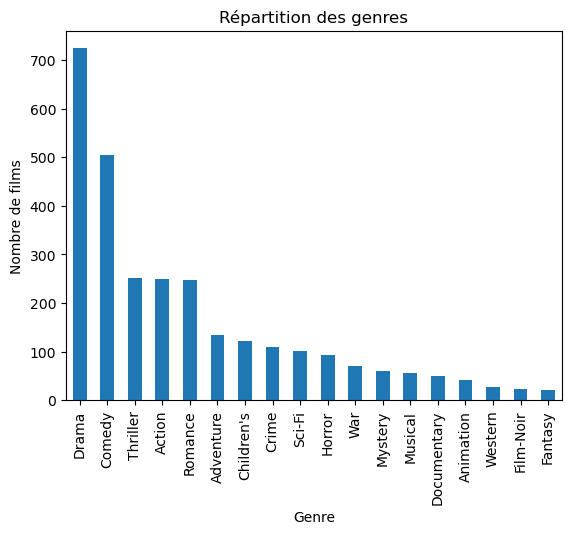

In [49]:
genre_columns = [col for col in movies.columns if col in [
    "Action", "Adventure", "Animation", "Children's", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir",
    "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller",
    "War", "Western"
]]
genre_counts = movies[genre_columns].sum().sort_values(ascending=False)

genre_counts.plot(kind="bar")
plt.title("Répartition des genres")
plt.xlabel("Genre")
plt.ylabel("Nombre de films")
plt.show()

### Contexte
Ce graphique montre la répartition des genres parmi les films dans le dataset. Chaque barre correspond au nombre de films appartenant à un genre donné.

### Observation
- Les genres les plus fréquents sont "Drama", "Comedy" et "Thriller".
- Certains genres comme "Film-Noir" et "Fantasy" sont beaucoup moins représentés.

### Conclusion
- Les genres les plus fréquents auront probablement plus d’évaluations, ce qui pourrait biaiser les recommandations.
- Les genres sous-représentés pourraient nécessiter des ajustements spécifiques pour s’assurer qu’ils apparaissent dans les suggestions.


### 6. Distribution des âges des utilisateurs

Visualise l'âge des utilisateurs :

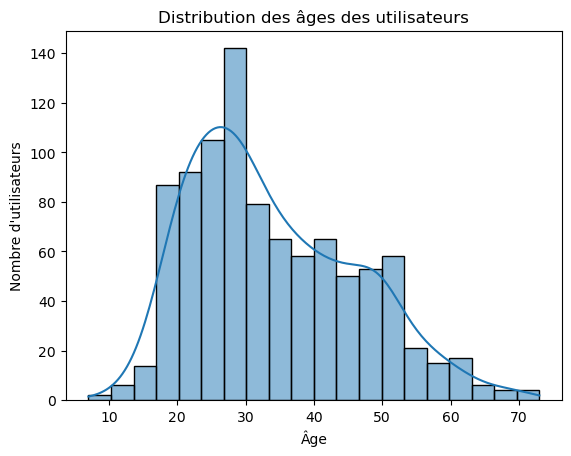

In [53]:
sns.histplot(users["age"], kde=True, bins=20)
plt.title("Distribution des âges des utilisateurs")
plt.xlabel("Âge")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

### Contexte
Ce graphique montre la répartition des âges des utilisateurs. Cela permet de mieux comprendre le profil démographique des évaluateurs.

### Observation
- La majorité des utilisateurs ont entre 20 et 40 ans, avec un pic autour de 30 ans.
- Les âges extrêmes (moins de 20 ans ou plus de 60 ans) sont beaucoup moins fréquents.

### Conclusion
- Les recommandations pourraient être biaisées en faveur des préférences des tranches d’âge dominantes.
- Une attention particulière pourrait être portée aux utilisateurs âgés ou très jeunes pour s’assurer que leurs intérêts sont pris en compte.


### 7. Répartition des notes par genre d'utilisateur

Analyse si le genre des utilisateurs influence les notes attribuées :

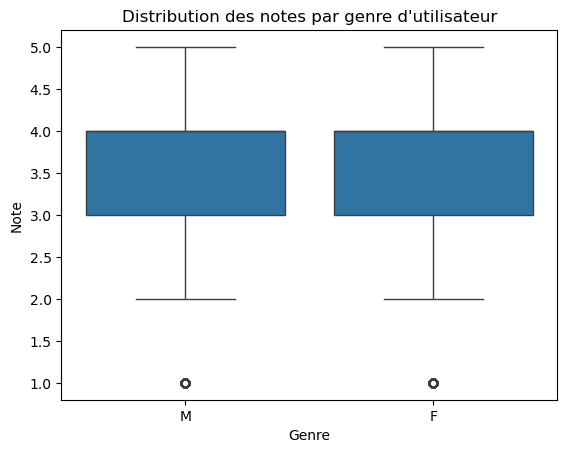

In [54]:
movie_ratings = ratings.merge(users, on="user_id")
sns.boxplot(x="gender", y="rating", data=movie_ratings)
plt.title("Distribution des notes par genre d'utilisateur")
plt.xlabel("Genre")
plt.ylabel("Note")
plt.show()

### Contexte
Ce graphique compare la répartition des notes données par les hommes ("M") et les femmes ("F"). Cela aide à identifier d’éventuelles différences dans les comportements d’évaluation.

### Observation
- La distribution des notes est similaire pour les deux genres, avec une médiane autour de 4.
- Les femmes semblent attribuer légèrement plus souvent des notes élevées.

### Conclusion
- Les différences entre genres ne sont pas significatives dans ce dataset.
- Cependant, il peut être intéressant d’explorer des différences sur des genres ou des catégories spécifiques de films.


# Préparer les données pour une base relationnelle

In [56]:
import sqlite3

conn = sqlite3.connect("../data/movielens.db")  # Crée un fichier pour la base
cursor = conn.cursor()  # Initialise le curseur pour exécuter des requêtes

cursor.execute("""
CREATE TABLE IF NOT EXISTS ratings (
    user_id INTEGER,
    item_id INTEGER,
    rating INTEGER,
    timestamp TEXT
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS movies (
    movie_id INTEGER PRIMARY KEY,
    movie_title TEXT,
    release_date TEXT,
    imdb_url TEXT,
    release_year INTEGER,
    Action INTEGER,
    Adventure INTEGER,
    Animation INTEGER,
    Children INTEGER,
    Comedy INTEGER,
    Crime INTEGER,
    Documentary INTEGER,
    Drama INTEGER,
    Fantasy INTEGER,
    FilmNoir INTEGER,
    Horror INTEGER,
    Musical INTEGER,
    Mystery INTEGER,
    Romance INTEGER,
    SciFi INTEGER,
    Thriller INTEGER,
    War INTEGER,
    Western INTEGER
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS users (
    user_id INTEGER PRIMARY KEY,
    age INTEGER,
    gender TEXT,
    occupation TEXT,
    zip_code TEXT
);
""")
conn.commit()

# Insérer les données
ratings.to_sql("ratings", conn, if_exists="replace", index=False)
movies.to_sql("movies", conn, if_exists="replace", index=False)
users.to_sql("users", conn, if_exists="replace", index=False)

# Valider les données
print(pd.read_sql("SELECT * FROM ratings LIMIT 5;", conn))
print(pd.read_sql("SELECT * FROM movies LIMIT 5;", conn))
print(pd.read_sql("SELECT * FROM users LIMIT 5;", conn))

query = """
SELECT u.user_id, u.gender, COUNT(r.rating) as num_ratings
FROM users u
JOIN ratings r ON u.user_id = r.user_id
GROUP BY u.user_id
LIMIT 5;
"""
print(pd.read_sql(query, conn))

# Fermer la connexion
conn.close()

   user_id  item_id  rating            timestamp
0      196      242       3  1997-12-04 15:55:49
1      186      302       3  1998-04-04 19:22:22
2       22      377       1  1997-11-07 07:18:36
3      244       51       2  1997-11-27 05:02:03
4      166      346       1  1998-02-02 05:33:16
   movie_id        movie_title release_date  \
0         1   Toy Story (1995)  01-Jan-1995   
1         2   GoldenEye (1995)  01-Jan-1995   
2         3  Four Rooms (1995)  01-Jan-1995   
3         4  Get Shorty (1995)  01-Jan-1995   
4         5     Copycat (1995)  01-Jan-1995   

                                            imdb_url  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)      

# Documenter et sauvegarder

In [57]:
ratings.to_csv("../data/cleaned_ratings.csv", index=False)
movies.to_csv("../data/cleaned_movies.csv", index=False)
users.to_csv("../data/cleaned_users.csv", index=False)

Fichiers sauvegardés :
- cleaned_ratings.csv : 99,987 évaluations (user_id, item_id, rating, timestamp).
- cleaned_movies.csv : 1,679 films avec métadonnées (genres, release_year, etc.).
- cleaned_users.csv : 943 utilisateurs avec informations démographiques.
